# DA5401 — Assignment 2

**Dimensionality Reduction, Visualization, and Classification Performance**

In this assignment, I will analyze the Mushroom Dataset, which classifies mushrooms as edible or poisonous based on various categorical attributes. 

> First, I will preprocess the data and explore its high-dimensional feature space. 

> Then, I will apply Principal Component Analysis (PCA) to reduce dimensionality and address feature redundancy. 

> Finally, I will train and evaluate a Logistic Regression classifier on both the original and PCA-transformed datasets, comparing their performance to understand the impact of dimensionality reduction.

## Part A: EDA & Preprocessing


#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('D:/VSC/datasets/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Now we will check for number of edible and poisonous mushrooms in the dataset.

In [5]:
print(df['class'].value_counts())

class
e    4208
p    3916
Name: count, dtype: int64


In [6]:

print((df == '?').sum())

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


##### Some of the missing values are inputed as "?"

**We will now replace the symbol '?' with 'missing'**

In [7]:
df = df.replace('?', 'missing')


With this we have an entirely categorical dataset.
Now we will perform One-hot encoding on all categorical features.

**Why one-hot encoding?** 

One-hot encoding transforms the dataset from categorical data to a fully numeric format. By converting each categorical value into a separate binary feature we can now perform PCA, because PCA and most linear algebra techniques require numerical input.

#### Encoding the features dataset

In [8]:

X = pd.get_dummies(df.drop(columns=['class']), prefix_sep='=')

#### Now Eencoding the target column

In [9]:
y = df['class'].map({'e':0, 'p':1}).astype(int)
print(y)

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64


In [10]:
print(X.shape)
X.iloc[:, :20].head()

(8124, 117)


,cap-shape=b,cap-shape=c,cap-shape=f,cap-shape=k,cap-shape=s,cap-shape=x,cap-surface=f,cap-surface=g,cap-surface=s,cap-surface=y,cap-color=b,cap-color=c,cap-color=e,cap-color=g,cap-color=n,cap-color=p,cap-color=r,cap-color=u,cap-color=w,cap-color=y
0,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
2,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False


##### **'There is a significant increase in the columns count from 23 to 117 after encoding'**

### **Standardization**

Even though one-hot features are binary, standardizing them before PCA ensures all features are on the same scale. This prevents any feature from dominating the variance and makes PCA results more stable and interpretable, it just rescales features for numerical stability and meaningful PCA results.

In [11]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
print('Standardized matrix shape: ', X_std.shape)


Standardized matrix shape:  (8124, 117)


## Part B Principal Component Analysis (PCA)

We will now apply PCA on the standardized, one-hot encoded dataset without specifying the number of components.

In [12]:
pca_full = PCA()
X_pca = pca_full.fit(X_std)
explained = pca_full.explained_variance_ratio_
c_explained = np.cumsum(explained)


Lets Generate a scree plot to visualize both the explained variance ratio (per component) and the cumulative explained variance ratio.

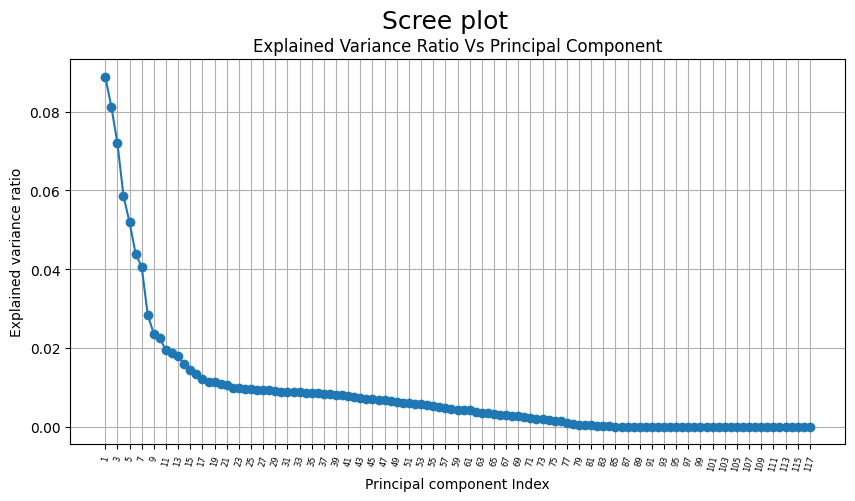

In [13]:

plt.figure(figsize=(10,5))
plt.plot(np.arange(1, len(explained)+1), explained, marker='o')
plt.suptitle('Scree plot',fontsize=18)
plt.title('Explained Variance Ratio Vs Principal Component')
plt.xlabel('Principal component Index')
plt.ylabel('Explained variance ratio')
plt.xticks(np.arange(1, len(explained)+1,2), rotation=75,fontsize=6)
plt.grid(True)
plt.show()

### Analyzing the scree plot to identify the “elbow point” and determine how many components are needed to capture most of the dataset’s variance.



From the scree plot, we observe a clear “elbow” around the 10th to 15th principal component, so we can take 12. This is the point where the explained variance ratio sharply decreases and the curve starts to flatten. Beyond this point, additional components contribute only marginally to the overall variance. Therefore, selecting 12 components would be a reasonable choice to balance dimensionality reduction with information retention.

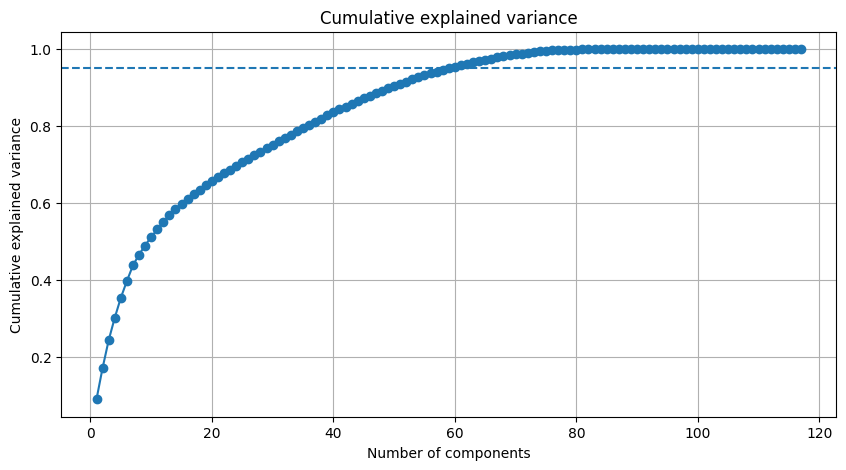

In [14]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1, len(c_explained)+1), c_explained, marker='o')
plt.axhline(0.95, linestyle='--')
plt.title('Cumulative explained variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.show()

In [15]:

n_components_95 = np.searchsorted(c_explained, 0.95) + 1
print(f'Number of components to retain >=95% variance: {n_components_95}')

Number of components to retain >=95% variance: 59


> Based on the cumulative explained variance plot, we see that it takes 59 principal components to retain at least 95% of the variance in the dataset. Although the scree plot visually suggests an elbow around the 10th component, following the 95% rule we select 59 components as the optimal number to balance dimensionality reduction with information preservation.

### Visualization of first two principal components

Project the data into the first two principal components and visualize class separability.

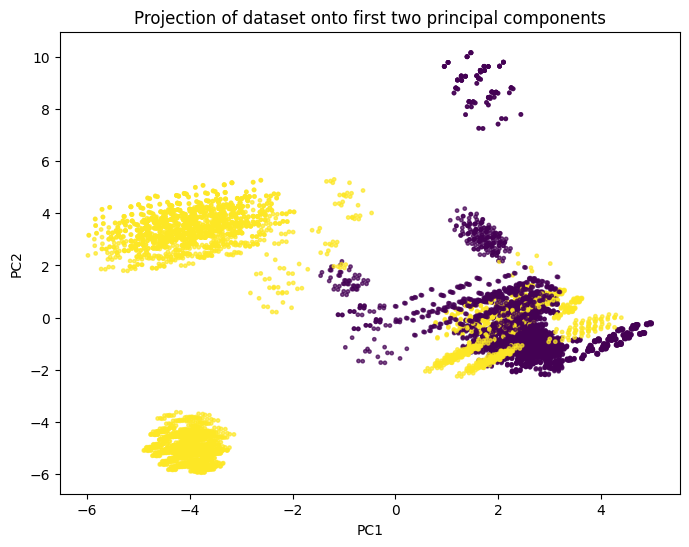

Count edible: 4208
Count poisonous: 3916


In [16]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_std)

plt.figure(figsize=(8,6))
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], s=6, alpha=0.7, c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of dataset onto first two principal components')
plt.show()

for label_val, label_name in [(0,'edible'), (1,'poisonous')]:
    mask = (y==label_val)
    print(f"Count {label_name}:", mask.sum())


> The projection onto the first two principal components reveals clear clustering, with some separation between edible and poisonous mushrooms. However, noticeable overlap remains, showing that PC1 and PC2 alone are insufficient for perfect class separation. More components or supervised methods are needed for accurate classification.

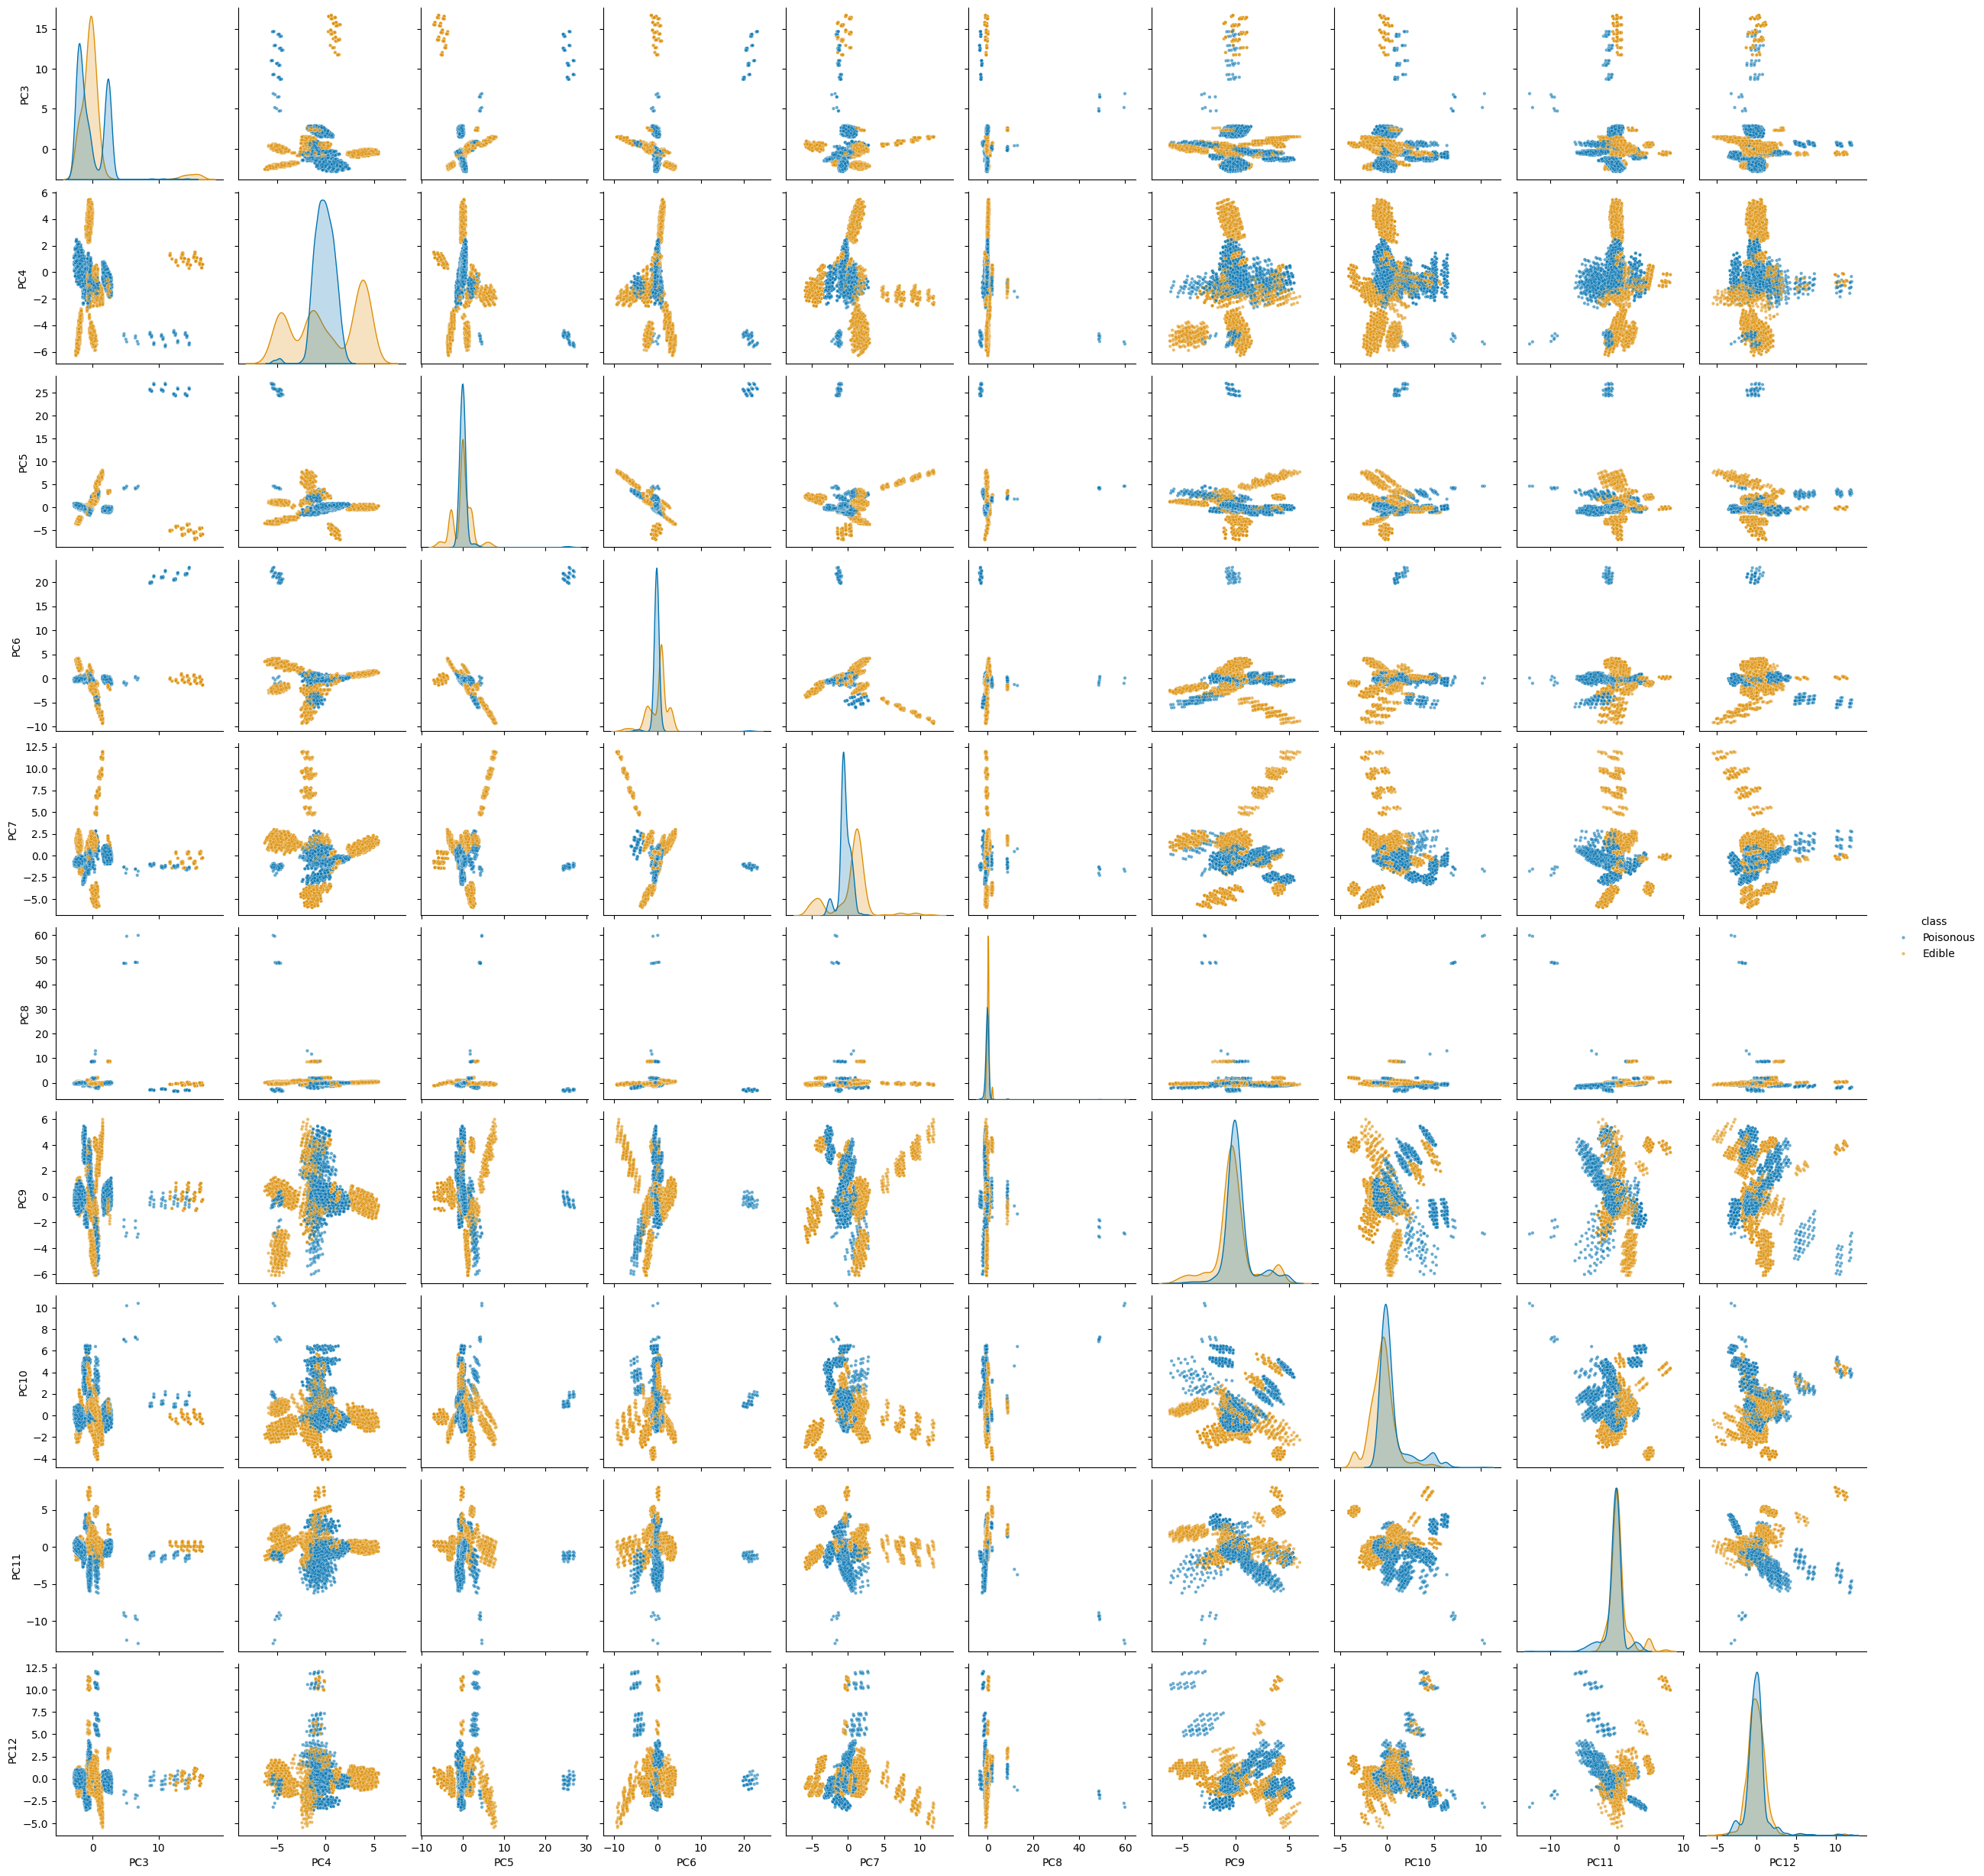

In [17]:
pca_12 = PCA(n_components=12)
X_pca_12 = pca_12.fit_transform(X_std)

pc_columns = [f'PC{i+1}' for i in range(12)]
df_pca = pd.DataFrame(X_pca_12, columns=pc_columns)
df_pca['class'] = y.map({0: 'Edible', 1: 'Poisonous'}) 


sns.pairplot(df_pca,vars=pc_columns[2:],hue="class",palette="colorblind",plot_kws={"s": 10, "alpha": 0.6})
plt.show()

> The pairplot of PCs 3–12 shows weaker separation between edible and poisonous mushrooms compared to the first two PCs. Most clusters overlap, indicating that later components capture less class-related variance and mainly represent minor variations or noise.

# Part C Performance Evaluation with Logistic Regression

We'll build two logistic regression models:

1. Baseline: trained on the original standardized one-hot encoded features.
2. PCA-transformed: trained on the reduced PCA features (chosen based on the 95% threshold).

We'll compare classification reports and accuracy.

## 1. Baseline Model

> ### Baseline Model for Original dataset

*Spliting dataset into train and test dataset*

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, stratify=y, random_state=42)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Train shape: (6093, 117) Test shape: (2031, 117)


In [19]:
orig = LogisticRegression(max_iter=1000, solver='liblinear')
orig.fit(X_train, y_train)

y_pred_orig = orig.predict(X_test)
print('Baseline model on original dataset, Accuracy:', accuracy_score(y_test, y_pred_orig))
print('\nClassification result on original features:')
print(classification_report(y_test, y_pred_orig, target_names=['edible','poisonous']))

Baseline model on original dataset, Accuracy: 1.0

Classification result on original features:
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1052
   poisonous       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



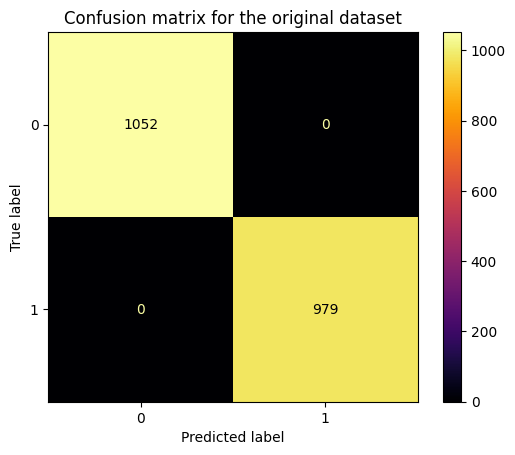

In [30]:
ConfusionMatrixDisplay.from_estimator(orig, X_test, y_test,cmap='inferno')
plt.title('Confusion matrix for the original dataset')
plt.show()

The logistic regression model achieved 100% accuracy on the original dataset, perfectly separating edible and poisonous mushrooms. This shows that the dataset’s features are highly discriminative, making the task much easier compared to real-world problems where perfect accuracy is uncommon.

### Baseline model for PCA reduced dataset

Here, we reduce the dataset to the optimal number of principal components that retain at least 95% of the variance. This gives us a compact feature set for building models while preserving most of the important information.

In [21]:
print('Using n_components =', n_components_95)

pca_opt = PCA(n_components=n_components_95)
X_pca_opt = pca_opt.fit_transform(X_std)

Using n_components = 59


> #### Spliting dataset into train and test dataset

In [28]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pca_opt, y, test_size=0.25, stratify=y, random_state=42)
clf_pca = LogisticRegression(max_iter=1000, solver='liblinear')
clf_pca.fit(X_train_p, y_train_p)

y_pred_pca = clf_pca.predict(X_test_p)
print('PCA model — Accuracy:', accuracy_score(y_test_p, y_pred_pca))
print('\nClassification report (PCA features):')
print(classification_report(y_test_p, y_pred_pca, target_names=['edible','poisonous']))

PCA model — Accuracy: 0.999015263417036

Classification report (PCA features):
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1052
   poisonous       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



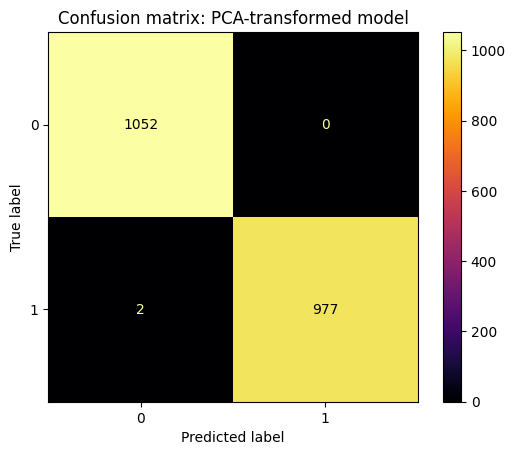

In [43]:
ConfusionMatrixDisplay.from_estimator(clf_pca, X_test_p, y_test_p,cmap='inferno')
plt.title('Confusion matrix: PCA-transformed model')
plt.show()


## ***CONCLUSION***

### Comparison and Analysis

- Original dataset: Logistic Regression achieved perfect classification with accuracy = 100%.

- PCA-transformed dataset (95% variance retained): Accuracy dropped slightly, with only 2 poisonous mushrooms misclassified as edible. The performance is still extremely high with >99.9%.

### Is there a significant difference?

- The performance difference is not significant, the PCA model nearly matches the baseline.

- The tiny drop is because PCA compresses the data into fewer dimensions, which introduces a small information loss.

- However, PCA reduces redundancy and handles correlated features, leading to a more compact, efficient representation with almost no cost in accuracy.

#### Did PCA's ability to handle feature collinearity and redundancy provide a performance benefit?

- Yes, PCA reduced feature collinearity and redundancy, giving a more compact dataset. 
However, since the original model was already perfect, the performance benefit was minimal.

#### Discuss the usefulness of using Logistic Regression as a surrogate performance measurement for evaluating the effectiveness of PCA.

- Logistic Regression is a lightweight, interpretable model, so changes in its performance clearly reflect whether PCA preserved or lost key information. Its near-identical accuracy before and after PCA confirms PCA’s effectiveness here.